In [1]:
import pandas as pd
import os

In [2]:
parent_path = r"E:\Projects\IMPACT OF E-WOM ON PURCHASE INTENTION OF KURTIS"

In [3]:
path = os.path.join(parent_path,'data','final_data.csv')
dataset = pd.read_csv(path)

In [5]:
dataset.head()

,Unnamed: 0,Rating,Review
0,0,Recommended,super quality love
1,1,Recommended,nice super
2,2,Not Recommended,poor quality
3,3,Not Recommended,colour fade first wash cloth shrink
4,4,Recommended,nice meterial tag dress sometimes delivery man...


In [6]:
dataset.drop(['Unnamed: 0'],axis = 1, inplace = True)

In [11]:
data = dataset.copy()
recommended = data.loc[data.Rating == "Recommended"]
non_recommended = data.loc[data.Rating == "Not Recommended"]

In [12]:
recommended.shape,non_recommended.shape

((4701, 2), (1252, 2))

In [13]:
recommended.isnull().sum()

Rating    0
Review    1
dtype: int64

In [14]:
recommended.dropna(axis= 0, inplace= True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_45396\2793357720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended.dropna(axis= 0, inplace= True)


In [15]:
non_recommended.isnull().sum()

Rating    0
Review    0
dtype: int64

## Word cloud Analysis

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud, STOPWORDS

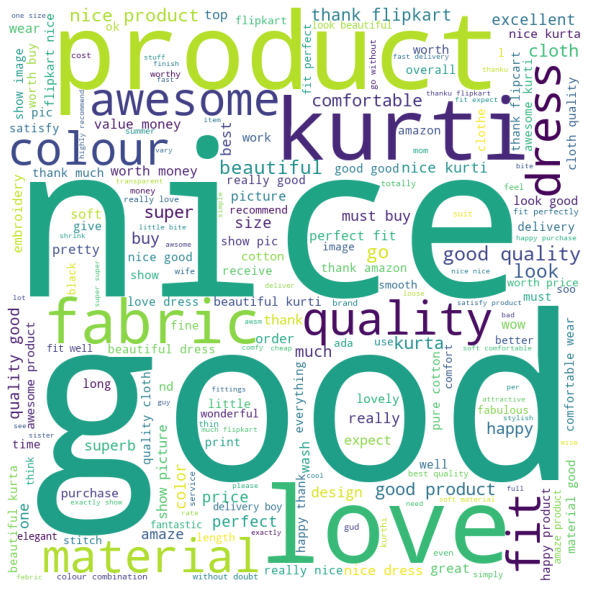

In [23]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in recommended.Review:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
image_path = os.path.join(parent_path, 'Images')
plt.savefig(os.path.join(image_path,'Recommended wordcloud'))
plt.show()



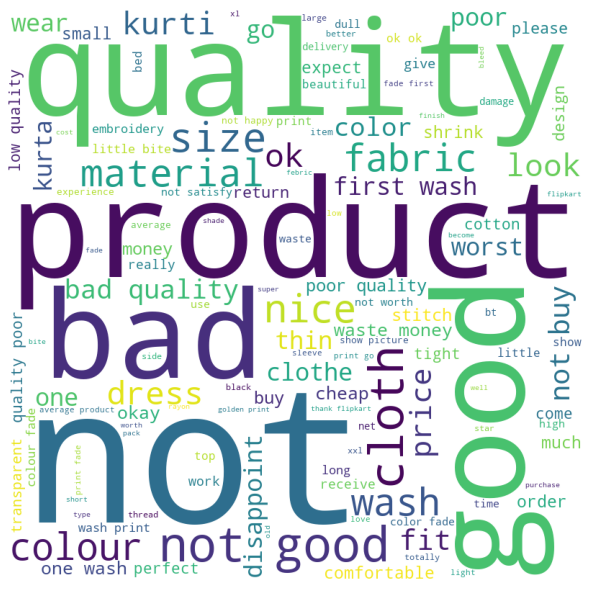

In [22]:
comment_words = ''

stopwords = set(STOPWORDS)
stopwords.remove('not')
 
# iterate through the csv file
for val in non_recommended.Review:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
image_path = os.path.join(parent_path, 'Images')
plt.savefig(os.path.join(image_path,'Non Recommended wordcloud.png'),format = "png")
plt.show()


## Emotion Analysis

In [17]:
import text2emotion as te

In [18]:
def get_emotion(x):
    result = te.get_emotion(x)
    emotion = dict([(value, key) for key, value in result.items()])
    return emotion[max(list(result.values()))]

In [19]:
recommended["Emotion"] = recommended["Review"].apply(get_emotion)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_45396\3270405303.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  recommended["Emotion"] = recommended["Review"].apply(get_emotion)


In [20]:
non_recommended["Emotion"] = non_recommended["Review"].apply(get_emotion)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_45396\2470143911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_recommended["Emotion"] = non_recommended["Review"].apply(get_emotion)


In [21]:
recommended.to_csv('recommended_emotion.csv')

In [22]:
non_recommended.to_csv('non_recommended_emotion.csv')

In [30]:
recommended.head()

,Rating,Review,Emotion
0,Recommended,super quality love,Happy
1,Recommended,nice super,Happy
4,Recommended,nice meterial tag dress sometimes delivery man...,Happy
5,Recommended,beautiful kurti affordable price happy,Happy
6,Recommended,super,Fear


In [31]:
recommended["Emotion"].value_counts()

Happy       2601
Fear        1042
Surprise     694
Sad          277
Angry         86
Name: Emotion, dtype: int64

In [46]:
image_path = os.path.join(parent_path, 'Images')

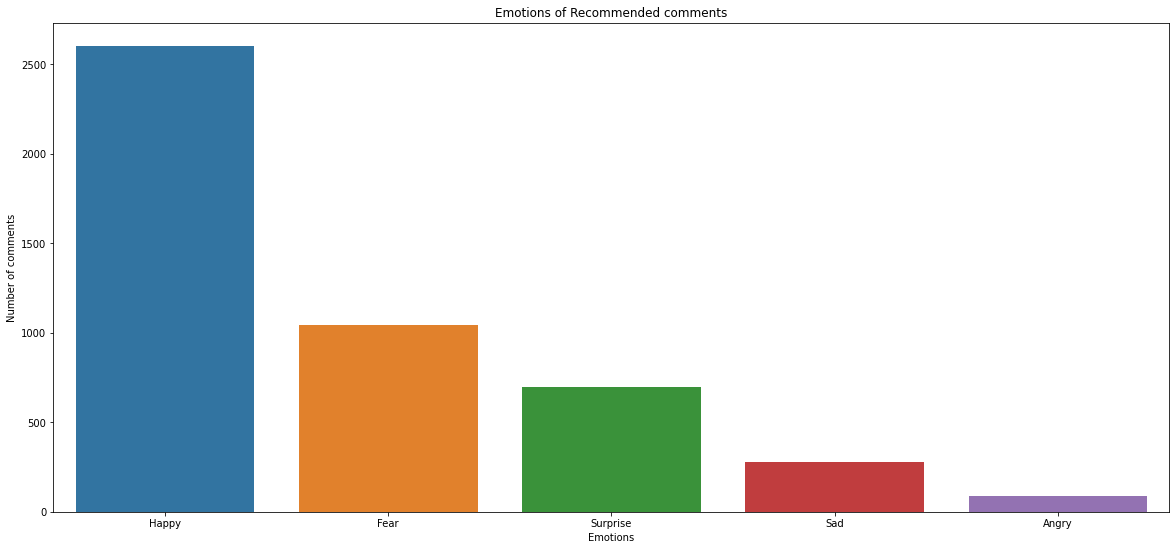

In [47]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (20,9))
sns.countplot(x = recommended['Emotion'])
ax.set_xlabel('Emotions')
ax.set_ylabel('Number of comments')
ax.set_title("Emotions of Recommended comments")
plt.savefig(os.path.join(image_path,'Emotions of Recommended comments'))
plt.show()

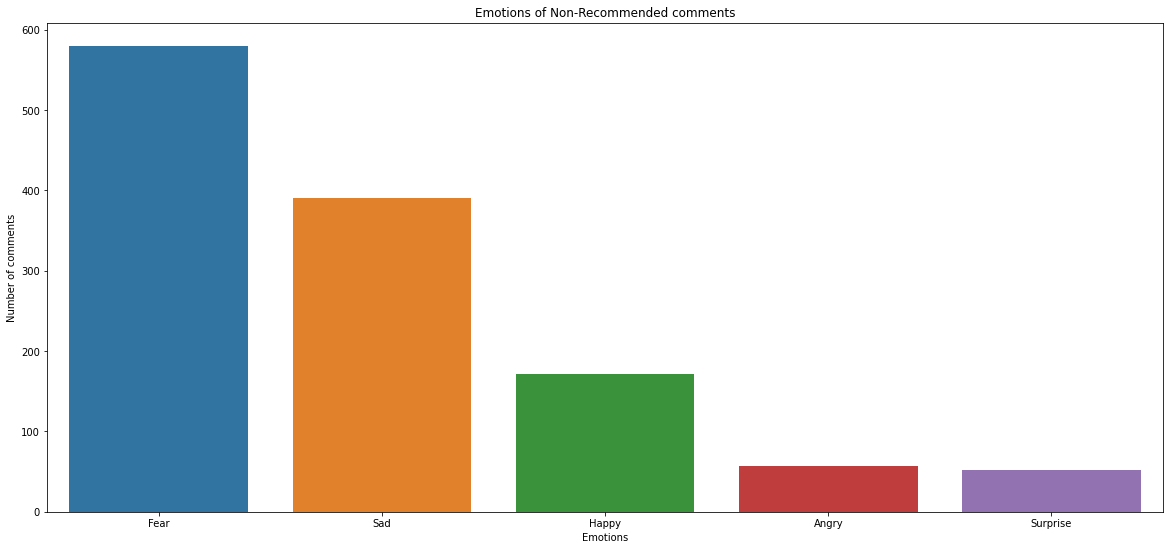

In [48]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (20,9))
sns.countplot(x = non_recommended['Emotion'])
ax.set_xlabel('Emotions')
ax.set_ylabel('Number of comments')
ax.set_title("Emotions of Non-Recommended comments")
plt.savefig(os.path.join(image_path,'Emotions of Non-Recommended comments'))
plt.show()